In [ ]:
# att-attach-find-isolated-attractors.ipynb
#
# Bryan Daniels
# 2024/1/10
#
# Use AttAttach to make networks with a specified number of isolated fixed points, then test
# our ability to predict the average control kernel size.
#

In [1]:
import numpy as np

In [2]:
import AttAttach.attattach as ata
import numpy as np
import random
from neet.controlkernel.control_kernel_analysis import ck_analysis
from neet.boolean.TransitionNetwork import transitions_to_net
import csv
from datetime import datetime
import tqdm

In [3]:
import matplotlib.pyplot as plt

In [4]:
# modified from https://stackoverflow.com/questions/2130016/
#     splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(a, n)
    return [(i+1)*k+min(i+1, m) - (i*k+min(i, m)) for i in range(n)]

In [13]:
def landscape_structure_given_s(s,net_size,num_attractors):
    """
    Create an attAttach landscape structure that contains 
    a given number s of isolated fixed points in a network
    of size net_size with num_attractors attractors.
    """
    assert(s < num_attractors)
    assert(num_attractors <= 2**net_size)
    
    # start with all attractors having basin size 1
    ls = np.ones(num_attractors,dtype=int)
    # set (num_attractors - s) attractors to equally share (2**net_size - s) states
    ls[:num_attractors - s] = split(int(2**net_size - s), int(num_attractors - s))
    
    assert(np.sum(ls)==2**net_size)
    
    return [ [1,wi/2**net_size] for wi in landscape_structure ]

In [9]:
def landscape_structure_to_net(landscape_structure,edge_permutation_type='random'):
    """
    Create transitions using AttAttach and implement the transitions in a Neet network.
    """
    # find edges in transition network
    edges = ata.generate_landscape(net_size,landscape_structure)
    
    # permute nodes in the transition network to correspond to Boolean states
    if edge_permutation_type == 'random':
        edge_transitions = ata.random_labels_permutation(edges)
        Hmax = None
    elif edge_permutation_type == 'smallH':
        Hmax,edge_transitions = ata.smallH_labels_permutation(edges,
                timeout=timeout)
    else:
        raise Exception('Unrecognized edge_permutation_type: {}'.format(edge_permutation_type))
            
    # translate transition list into neet network
    for i,e in enumerate(edge_transitions):
        assert(e[0]==i) # sanity check
    transitions = [ e[1] for e in edge_transitions ]
    net = transitions_to_net(transitions)
    
    return net

In [6]:
landscape_structure_given_s(57,10,100)

array([23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [14]:
net_size = 10
num_networks = 10
num_attractors = 100
s_frac_list = np.linspace(0,1,num_networks)
s_max = num_attractors - 1
s_list = [ min(s_max,int(s_frac*num_attractors)) for s_frac in s_frac_list ]

landscape_structure = landscape_structure_given_s(s_list[-1],net_size,num_attractors)

In [74]:
landscape_structure

array([925,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])

In [88]:
net.basin_sizes

array([925,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])

In [92]:
ck_sizes = ck_analysis(net)['control_kernel_sizes']

Finding attractors and control kernels...


In [91]:
np.mean(_90)

6.15

In [84]:
# 

net_size = 10
num_networks = 10
num_attractors = 100
s_frac_list = np.linspace(0,1,num_networks)
s_max = num_attractors - 1
s_list = [ min(s_max,int(s_frac*num_attractors)) for s_frac in s_frac_list ]
                   
seed_list = [12345,]

edge_permutation_type = 'random'

ck_mean_sizes = []

# loop over samples for a given fraction of isolated fixed points
for s in tqdm.tqdm(s_list):
    print("Running s={}".format(s))
    for seed in seed_list:
        print("    Running seed={}".format(seed))

        landscape_structure = landscape_structure_given_s(s,net_size,num_attractors)
        
        #landscape_structure = [ [1,wi/2**net_size] for wi in landscape_structure ]
        
        #print("landscape_structure = {}".format(landscape_structure))
        
        random.seed(seed)
        start_time = datetime.now()

        
        if edges:
            #print("DEBUG: run_basin_entropy_scan: edges = {}".format(edges))
            # randomize edges to create edge_transitions
            #print("DEBUG: run_basin_entropy_scan: edge_transitions = {}".format(edge_transitions))

            

            # do control kernel analysis
            ck_data = ck_analysis(net)
            ck_mean_size = np.mean(
                ck_data['control_kernel_sizes'])

            print("Control kernel sizes = {}".format(ck_data['control_kernel_sizes']))
            
            end_time = datetime.now()
            elapsed_time = end_time - start_time

            ck_mean_sizes.append(ck_mean_size)
            

  0%|                                                    | 0/10 [00:00<?, ?it/s]

Running s=0
    Running seed=12345
landscape_structure = [[1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.0107421875], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], [1, 0.009765625], 

 10%|████▍                                       | 1/10 [00:04<00:37,  4.18s/it]

Control kernel sizes = [6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 10, 6, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5, 7, 7, 6, 5, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 5, 7, 6, 5, 6, 7, 6, 7, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 6, 5, 5, 6, 7, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 7]
Running s=11
    Running seed=12345
landscape_structure = [[1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.01171875], [1, 0.0107421875], [1, 0.0107421875], 

 20%|████████▊                                   | 2/10 [00:08<00:34,  4.26s/it]

Control kernel sizes = [7, 6, 5, 6, 6, 7, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 7, 7, 5, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 7, 6, 5, 7, 6, 6, 6, 7, 6, 7, 7, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 7, 6, 7, 6, 6, 6, 6, 8, 6, 7, 5, 6, 6, 5, 6, 5, 7, 6, 7, 6, 6, 7, 4, 5, 6, 5]
Running s=22
    Running seed=12345
landscape_structure = [[1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.0126953125], [1, 0.012

 30%|█████████████▏                              | 3/10 [00:12<00:29,  4.19s/it]

Control kernel sizes = [6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 4, 6, 7, 7, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 6]
Running s=33
    Running seed=12345
landscape_structure = [[1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.0146484375], [1, 0.014

 40%|█████████████████▌                          | 4/10 [00:16<00:25,  4.26s/it]

Control kernel sizes = [6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 8, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 7, 6, 5, 6, 8, 6, 6, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 7, 6, 5, 4, 7, 6, 7, 5, 5, 6, 6, 6, 7, 6, 5, 5, 6, 5, 7, 6, 5, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5]
Running s=44
    Running seed=12345
landscape_structure = [[1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.017578125], [1, 0.0166015625], [1, 0.0166015625], [1, 0.0166015625], [1, 0.0166015625], [1, 0.0166015625], [1, 0.0166015625],

 50%|██████████████████████                      | 5/10 [00:21<00:21,  4.22s/it]

Control kernel sizes = [6, 6, 7, 6, 7, 6, 7, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 7, 6, 6, 6, 5, 7, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 7, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 8, 5, 6, 6, 5, 6, 5, 6, 5, 7, 7, 5, 6, 6]
Running s=55
    Running seed=12345
landscape_structure = [[1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.021484375], [1, 0.0205078125], [1, 0.0205078125], [1, 0.0205078125], [1, 0.0205078125], [1, 0.0205078125], [1, 0.0205078125], [1, 0.0205078125], [1, 0.0205078125], [1, 0.0205078125], [1, 0.02050781

 60%|██████████████████████████▍                 | 6/10 [00:25<00:16,  4.11s/it]

Control kernel sizes = [5, 6, 5, 6, 5, 6, 5, 7, 5, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 8, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 10, 6, 7, 6, 5, 6, 6, 6, 7, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 7, 7]
Running s=66
    Running seed=12345
landscape_structure = [[1, 0.0283203125], [1, 0.0283203125], [1, 0.0283203125], [1, 0.0283203125], [1, 0.0283203125], [1, 0.0283203125], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.02734375], [1, 0.0009765625], [1, 0.0

 70%|██████████████████████████████▊             | 7/10 [00:29<00:12,  4.10s/it]

Control kernel sizes = [7, 6, 7, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 7, 7, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7, 7, 4, 6, 5, 6, 7, 7, 6, 5, 6, 6, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 7, 6, 7, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 7, 6, 6, 6, 6, 5, 9, 5, 6, 6, 5, 5]
Running s=77
    Running seed=12345
landscape_structure = [[1, 0.041015625], [1, 0.041015625], [1, 0.041015625], [1, 0.041015625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0400390625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765

 80%|███████████████████████████████████▏        | 8/10 [00:33<00:08,  4.22s/it]

Control kernel sizes = [6, 6, 7, 6, 5, 5, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 5, 7, 7, 6, 5, 7, 7, 7, 5, 6, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 5, 6, 6, 6, 6, 7, 6, 7, 6, 5, 5, 6, 7, 5, 7, 6, 5, 7, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6]
Running s=88
    Running seed=12345
landscape_structure = [[1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.076171875], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1

 90%|███████████████████████████████████████▌    | 9/10 [00:37<00:04,  4.25s/it]

Control kernel sizes = [6, 6, 7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 7, 6, 6, 6, 4, 6, 5, 4, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 5, 7, 6, 6, 9, 7, 6, 6, 7, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 7, 7, 5, 7, 5, 5, 5, 6, 6, 7, 6, 6, 6, 5, 8, 6, 6, 6, 6]
Running s=99
    Running seed=12345
landscape_structure = [[1, 0.9033203125], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.0009765625], [1, 0.000

100%|███████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]

Control kernel sizes = [5, 6, 6, 6, 6, 6, 4, 6, 5, 5, 6, 6, 6, 6, 6, 7, 7, 5, 5, 6, 6, 6, 6, 7, 6, 5, 5, 6, 8, 7, 6, 6, 6, 6, 5, 7, 7, 7, 6, 7, 6, 6, 7, 5, 7, 7, 7, 6, 7, 6, 5, 6, 7, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 7, 8, 6, 5, 7, 7, 7, 6, 7, 7, 5, 5, 10, 6, 9, 6, 6, 6, 5, 6, 6, 7]


In [86]:
net.transitions

array([ 369,  889,  265, ...,  576, 1022, 1023])

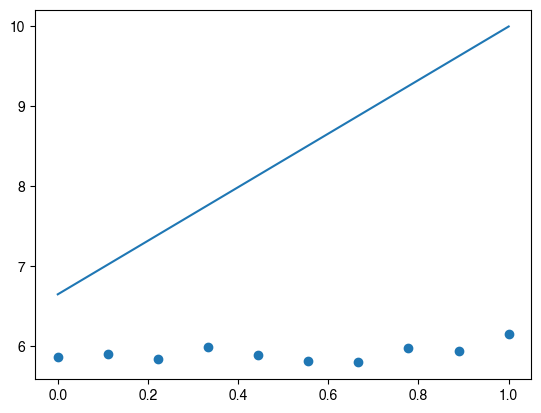

In [87]:
plt.scatter(s_frac_list,ck_mean_sizes)
plt.plot([0,1],[np.log2(num_attractors),net_size])

In [ ]:
# CHECK THAT PREIMAGES FUNCTION ALSO FINDS SAME BASINS OF SIZE 1

In [7]:
from preimages import preimages

In [16]:
net = landscape_structure_to_net(landscape_structure)
net.basin_sizes

array([925,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])

In [33]:
# sizes of preimages
np.array([ len(preimages(net,net.decode(att[0]))) for att in net.attractors ])

array([106,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])